In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
import tensorflow as tf

In [30]:
data=pd.read_csv("International Airline Passengers.csv")

In [31]:
data.shape

(144, 2)

In [32]:
train_size=int(len(data)*0.80)

In [33]:
train=data[:train_size]
test=data[train_size:]

In [34]:
train_data=train.copy()
test_data=test.copy()

In [35]:
len(train_data), len(test_data)

(115, 29)

In [36]:
training_data=train_data.iloc[:, 1].values
real_passesnger_number=test_data.iloc[:, 1].values

In [37]:
total_data=pd.concat([train['No_passengers_thousands'],test['No_passengers_thousands']],axis=0)

In [38]:
train_data=training_data.reshape(-1,1)

In [39]:
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(train_data)

In [40]:
training_set_scaled.shape

(115, 1)

In [41]:
X_train=[]
y_train=[]
for i in range(5,115):
    X_train.append(training_set_scaled[i-5:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [42]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [43]:
X_train.shape

(110, 5, 1)

In [44]:
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)

In [45]:
regressor=Sequential()

regressor.add(LSTM(units=100,return_sequences=True,input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.1))

regressor.add(LSTM(units=100,return_sequences=True))
regressor.add(Dropout(0.1))

regressor.add(LSTM(units=100,return_sequences=True))
regressor.add(Dropout(0.15))

regressor.add(LSTM(units=100))
regressor.add(Dropout(0.15))

regressor.add(Dense(units=1))

regressor.compile(optimizer='adam',loss='mean_squared_error')

In [46]:
regressor.fit(X_train,y_train,epochs=100,batch_size=16)

Epoch 1/100
7/7 [==============================] - 0s 9ms/step - loss: 0.1437
Epoch 2/100
7/7 [==============================] - 0s 9ms/step - loss: 0.0419
Epoch 3/100
7/7 [==============================] - 0s 8ms/step - loss: 0.0313
Epoch 4/100
7/7 [==============================] - 0s 8ms/step - loss: 0.0296
Epoch 5/100
7/7 [==============================] - 0s 7ms/step - loss: 0.0206
Epoch 6/100
7/7 [==============================] - 0s 8ms/step - loss: 0.0192
Epoch 7/100
7/7 [==============================] - 0s 8ms/step - loss: 0.0200
Epoch 8/100
7/7 [==============================] - 0s 8ms/step - loss: 0.0213
Epoch 9/100
7/7 [==============================] - 0s 8ms/step - loss: 0.0198
Epoch 10/100
7/7 [==============================] - 0s 7ms/step - loss: 0.0203
Epoch 11/100
7/7 [==============================] - 0s 8ms/step - loss: 0.0182
Epoch 12/100
7/7 [==============================] - 0s 8ms/step - loss: 0.0177
Epoch 13/100
7/7 [==============================] - 0s 7ms/st

In [47]:
inputs=total_data[len(total_data)-len(test)-5:].values
inputs=inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [48]:
X_test=[]
for i in range(5,12):
    X_test.append(inputs[i-5:i,0])
X_test= np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [49]:
predicted_passesnger_number=regressor.predict(X_test)
predicted_passesnger_number=sc.inverse_transform(predicted_passesnger_number)

In [50]:
predicted_passesnger_number

array([[499.05707],
       [464.5952 ],
       [315.78394],
       [354.44604],
       [323.6294 ],
       [359.1633 ],
       [375.40714]], dtype=float32)

In [51]:
len(predicted_passesnger_number), len(real_passesnger_number)

(7, 29)

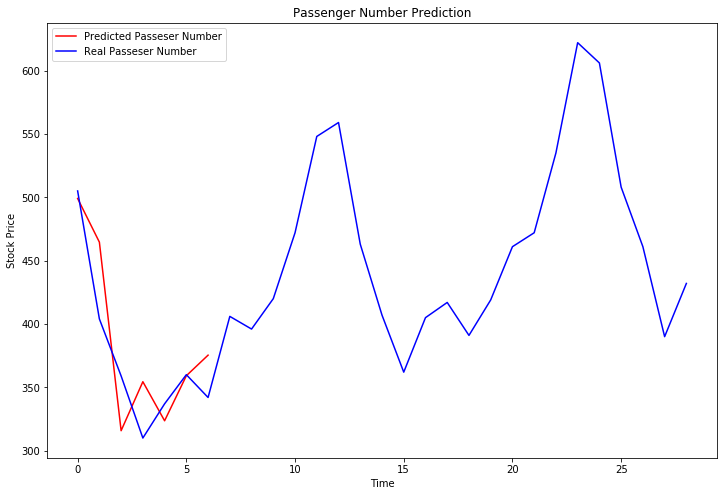

In [52]:
#Visualization
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(predicted_passesnger_number,color='red',label='Predicted Passeser Number')
plt.plot(real_passesnger_number,color='blue',label='Real Passeser Number')
plt.title('Passenger Number Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [53]:
predicted_passesnger_number_test=regressor.predict(X_test[0].reshape((1,5,1)))
predicted_passesnger_number_test=sc.inverse_transform(predicted_passesnger_number_test)

In [54]:
list(predicted_passesnger_number_test)[0].item()

499.05706787109375

## for future years forecast

In [58]:
input_=train.No_passengers_thousands[-5:].values.reshape(-1,1)
input_ = sc.transform(input_)

In [59]:
input_=input_.reshape((1,5,1))

In [61]:
input_=train.No_passengers_thousands[-5:].values.reshape(-1,1)

In [63]:
ti=np.append(input_,[625]).reshape(-1,1)

In [65]:
import time

In [66]:
predicted_passenger_future=[]
input_normal=train.No_passengers_thousands[-5:].values.reshape(-1,1)
for i in range(36):
    input_ = sc.transform(input_normal[-5:])
    input_=input_.reshape((1,5,1))
    pred_trans=regressor.predict(input_)
    pred=sc.inverse_transform(pred_trans)
    predicted_passenger_future.append(pred)
    input_normal=np.append(input_normal,[pred]).reshape(-1,1)

In [68]:
predicted_passenger_future_values=[]
for i in predicted_passenger_future:
    predicted_passenger_future_values.append(i.item())

In [70]:
input_real=list(train.No_passengers_thousands[-5:].values)
input_real

[362, 348, 363, 435, 491]

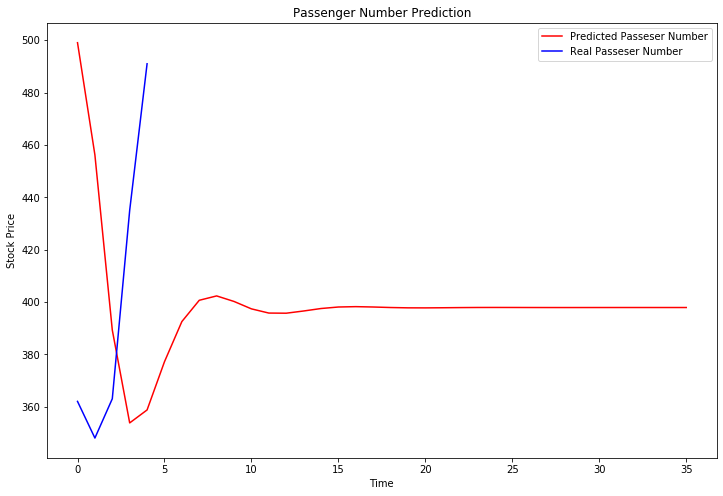

In [71]:
#Visualization
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(predicted_passenger_future_values,color='red',label='Predicted Passeser Number')
plt.plot(input_real,color='blue',label='Real Passeser Number')
plt.title('Passenger Number Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

### Here is the predicted data for future 36 months.Data was much less and for future forecast I have used predicted values. Thus the error keep increasing, so if we can arrange more data we can large window size that can help in better accuracy. :)